In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

### How data looks like

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../data/airbnb_results.csv')
df.userId = df.userId.astype(str)

print(f'#rows: {df.shape[0]}, #columns: {df.shape[1]}')

df.head()

#rows: 300, #columns: 25


,id,userId,name,address,city,isSuperhost,lat,lng,persons,rating,reviewsCount,type,cancelPolicy,deeplink,hostThumbnail,price_currency,price_rate,price_total,bathrooms,bedrooms,beds,previewAmenities,url,images,amenityIds
0,1055277831854819271,229152019,Second guest room,"Richmond, BC, Canada",Richmond,True,49.138909,-123.13500,1,4.90,10,Private room in rental unit,CANCEL_BETTER_STRICT_WITH_GRACE_PERIOD,https://www.airbnb.com/rooms/10552778318548192...,https://a0.muscache.com/im/pictures/user/User-...,CAD,67,67,0.5,1,1,"Free parking, Wifi, Kitchen",https://www.airbnb.com/rooms/1055277831854819271,['https://a0.muscache.com/im/pictures/miso/Hos...,"[1, 4, 36, 8, 9]"
1,32638360,25361236,Spacious Room at YVR lic#23-031530,"Richmond, BC, Canada",Richmond,True,49.189160,-123.14869,1,4.74,437,Private room in home,CANCEL_FLEXIBLE,https://www.airbnb.com/rooms/32638360?check_in...,https://a0.muscache.com/im/pictures/user/User-...,CAD,141,141,1.0,1,1,"Free parking, Wifi, Self check-in",https://www.airbnb.com/rooms/32638360,['https://a0.muscache.com/im/pictures/miso/Hos...,"[1, 2, 4, 9, 137, 77, 79, 657, 85, 661, 86, 23..."
2,13701691,20664187,Charming garden level studio. Completely private.,"Vancouver, BC, Canada",Vancouver,False,49.240320,-123.06304,2,4.73,471,Entire home,CANCEL_MODERATE,https://www.airbnb.com/rooms/13701691?check_in...,https://a0.muscache.com/im/pictures/user/f06aa...,CAD,165,165,1.0,0,1,"Wifi, Kitchen",https://www.airbnb.com/rooms/13701691,['https://a0.muscache.com/im/pictures/ba6303db...,"[1, 3, 4, 8, 77, 85, 86, 23, 87, 89, 90, 91, 9..."
3,49469357,94403842,Cozy King Sized Bed Private Entrance Suite,"Richmond, BC, Canada",Richmond,False,49.163760,-123.17295,2,4.72,240,Entire guesthouse,CANCEL_STRICT_14_WITH_GRACE_PERIOD,https://www.airbnb.com/rooms/49469357?check_in...,https://a0.muscache.com/im/pictures/user/User-...,CAD,143,143,1.0,1,1,"Free parking, Wifi",https://www.airbnb.com/rooms/49469357,['https://a0.muscache.com/im/pictures/miso/Hos...,"[1, 35, 4, 36, 5, 37, 39, 40, 9, 41, 137, 42, ..."
4,817468470131939808,498146749,Safe Convenient Private Stay near YVR #23021242,"Richmond, BC, Canada",Richmond,True,49.165980,-123.15429,2,4.93,102,Private room in home,CANCEL_FLEXIBLE,https://www.airbnb.com/rooms/81746847013193980...,https://a0.muscache.com/im/pictures/user/User-...,CAD,159,159,1.0,1,1,"Free parking, Wifi, Kitchen, Self check-in",https://www.airbnb.com/rooms/817468470131939808,['https://a0.muscache.com/im/pictures/miso/Hos...,"[1, 4, 8, 9, 73, 137, 649, 651, 77, 79, 80, 65..."


In [3]:
# Group by userId and count the number of listings per user
user_listing_counts = df.groupby('userId').size().reset_index(name='listing_count')

# Filter users who have more than one listing
filtered_users = user_listing_counts[user_listing_counts['listing_count'] > 1]

# Sort the users by the number of listings
sorted_users = filtered_users.sort_values(by='listing_count', ascending=False)

### Hosts userId with more than 1 listings

In [4]:
# check Airbnb host by Id like https://www.airbnb.ca/users/show/410216127

sorted_users

,userId,listing_count
49,206443487,4
136,468057278,4
12,132356031,4
102,37002842,4
115,410216127,3
149,480094612,3
146,475965908,3
117,414175819,3
242,94403842,3
28,161061873,3


### Number of listings per host

300 total number of listings


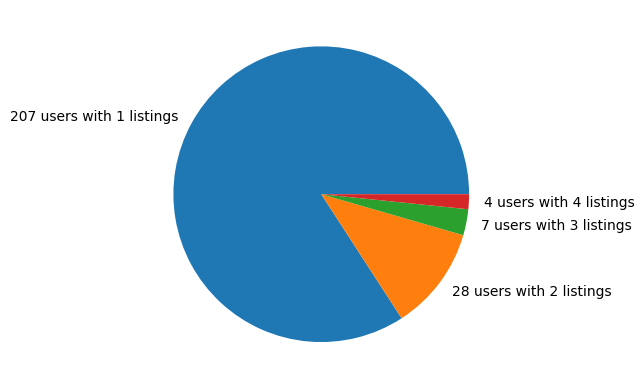

In [5]:
number_of_listings_per_user = user_listing_counts.listing_count.value_counts()

labels = [f'{n_users} users with {n_listings} listings' 
          for n_listings, n_users 
          in zip(number_of_listings_per_user.index.values, number_of_listings_per_user.values)]

print(f'{df.shape[0]} total number of listings')
plt.pie(number_of_listings_per_user, labels=labels);